#nflfastR tutorial - Python
[<img align="left" alt="nflfastR" width="75px" src="https://www.nflfastr.com/reference/figures/logo.png" />][nflfastR] 
[<img align="left" alt="Python" width="75px" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcode.fb.com%2Fwp-content%2Fuploads%2F2016%2F05%2F2000px-Python-logo-notext.svg_.png&f=1&nofb=1" />][Python]


<br/>
<br/>
<br/>
<br/>


####**By: [@mnpykings](https://twitter.com/mnpykings), 2020**

<br/>

*Right click icons and links throughout to direct you to their respective sites!*

[nflfastR]: https://mrcaseb.github.io/nflfastR/
[Python]: https://www.python.org/ 

#Introduction + Shoutouts

Hey everyone! Before we get started, I want to give some very deserving shoutouts. First off, [Ben Baldwin](https://twitter.com/benbbaldwin) and [Sebastian Carl](https://twitter.com/mrcaseb) do an incredible job maintaining this package and the NFL play-by-play data; they are really pioneering public analytics by lowering the barrier to entry with their content.  

Next, I'd like to shoutout [Deryck](https://twitter.com/DeryckG_). He has an awesome python guide for nflfastR as well and I will be using some of his code snippets (I'll mention when I do so). I'm creating this tutorial to go along with his because I figured the more open source the merrier. To keep things fresh, this tutorial will focus on leveraging the data for Fantasy Football/DFS applications rather than general NFL analytics which he covers in [his tutorial](https://gist.github.com/Deryck97/dff8d33e9f841568201a2a0d5519ac5e).

With all of that being said, let's hop right into it! I use [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) for my coding and that is what I encourage you to use as well. Google Colab is a tool that allows users to write, run, and share code within a single document on Google Drive. It hosts a cloud-based runtime, meaning that the only things you need to start coding in python are a Google account and an internet connection. No IDE, no virtual environments, and no installing packages (for the most part). Just open a document and start coding!

#Part 1 - Importing Packages and Scraping the Data

##Importing Packages
Since Google Colab hosts a cloud based run-time, we can start using python and its packages with no prior set up. However, in order to utilize these pacakges, they must be imported to our notebook document. The following four packages are an absolute must when working with data in python; no analysis can be done without them. 

 - [<img align="left" alt="pandas" width="150px" src="https://pandas.pydata.org/docs/_static/pandas.svg" />][pandas] This library provides easy-to-use data analysis and manipulation tools for python.

<br/>

 - [<img align="left" alt="matplotlib" width="150px" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmatplotlib.org%2F_static%2Flogo2.png&f=1&nofb=1" />][matplotlib] This is the basic plotting library for python that allows us to vizualize our data.

<br/>

 - [<img align="left" alt="Seaborn" width="150px" src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" />][Seaborn] Think of this as an attachment to matplotlib. We can utilize it to enhance our plots in a variety of ways.

<br/>

 - [<img align="left" alt="numpy" width="150px" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2F3%2F31%2FNumPy_logo_2020.svg%2F1024px-NumPy_logo_2020.svg.png&f=1&nofb=1" />][numpy] A python library used for mathematical operations and working with arrays (we will only use this a few times)

<br/>
<br/>

We can import these packages with the following code:

[Seaborn]: https://seaborn.pydata.org/#
[matplotlib]: https://matplotlib.org/#
[pandas]: https://pandas.pydata.org/docs/
[numpy]: https://numpy.org/




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

*We use shorter aliases when importing these pacakges for qulity of life purposes. When calling a function from a package, we need to preface it with its alias. For example, having to type out ```matplotlib.pyplot.plot()``` every time you'd like to plot something is rather inconvenient as opposed to using the alias we assigned to it by typing ```plt.plot()```*.

##Scraping the data

Now that we have our packages imported, we can scrape the play-by-play data (thanks to Deryck for this code!). Run the according cell depending on how many seasons of data you want. The pbp data goes back to 1999, but the first year that recorded all of the metrics we need was 2006, so I'd generally recommend not going earlier than that. For the purpose of this tutorial, I am going to use 2020 data only. We can do this by first assigning the season(s) we want to the variable `YEAR`. Then we read the data from the nflfastR [data repository](https://github.com/guga31bb/nflfastR-data/tree/master/data) to the pandas `.read_csv()` method and assign it to the variable `data`.

*Notice here we are already using the* `pd` *ailias we gave to the pandas package, neat!*

In [2]:
#Single season
YEAR = 2020

data = pd.read_csv(
    'https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' \
    + str(YEAR) + '.csv.gz?raw=True',compression='gzip', low_memory=False
    )

In [20]:
# #Multiple seasons
# YEARS = [2020,2019,2018]

# data = pd.DataFrame()

# for i in YEARS:  
#   i_data = pd.read_csv(
#       'https://github.com/guga31bb/nflfastR-data/blob/' \
#       'master/data/play_by_play_' + str(i) + '.csv.gz?raw=True',
#       compression='gzip', low_memory=False
#       )
  
#   data = data.append(i_data, sort=True)

Awesome, now we have the data we want assigned to the variable `data` in the form of a pandas dataframe! A dataframe is very similar to a spreadsheet; it's two-dimensional tabular data. If you ever wish to save a dataframe that you're working on, you can use the pandas methods `.to_excel()` or `.to_csv()` depending on the format you prefer. For example, to save this pbp data as a .csv file, the following code will do the trick.

In [ ]:
data.to_csv('filename.csv')

#Part 2 - Getting to Know the Data

The necessary packages and data are all imported and ready to go, so now we can start doing some analysis with it! First, we will look at some pandas methods that we can leverage to familiarize ourselves with the data. Methods must be attached to an object (which is what we assign variables to), so every method we use must be prefaced with our `data`. I will explain some of these basic methods below.

In [3]:
#.shape returns the shape of the dataframe
#in the format (rows,columns)
data.shape

(11666, 340)

In [4]:
#.columns prints out every column name, which
#is super useful since this data has a ton of them
data.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'receiver_id', 'name', 'jersey_number', 'id', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd'],
      dtype='object', length=340)

*Note that we can't see every column. If that's what you'd prefer, you can run `list(data)` to see every column one by one. I'm not going to do that here because it would take up a ton of space as it prints one per line.*

In [5]:
#.dtypes returns the datatype of every column
data.dtypes

play_id                  int64
game_id                 object
old_game_id              int64
home_team               object
away_team               object
                        ...   
xyac_epa               float64
xyac_mean_yardage      float64
xyac_median_yardage    float64
xyac_success           float64
xyac_fd                float64
Length: 340, dtype: object

Some of the most common pandas datatypes you will come across include:

`object` - text or mixed numeric and non-numeric values

`int64` - integer numbers

`float64` - floating point (decimal) numbers

`bool` - true/false values

`datetime64` - date and time values

In [6]:
#.head(n) prints out the first n rows of data
#inversely, .tail(n) prints the last n rows
#.sample(n) prints a random sample of n rows
data.head(3)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,...,home_score,location,result,total,spread_line,total_line,div_game,roof,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,success,passer,passer_jersey_number,rusher,rusher_jersey_number,receiver,receiver_jersey_number,pass,rush,first_down,aborted_play,special,play,passer_id,rusher_id,receiver_id,name,jersey_number,id,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd
0,1,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,NaN,NaN,NaN,NaN,NaN,2020-09-13,900.0,1800.0,3600.0,Half1,0,NaN,0,1,NaN,0,15:00,ARI 35,0,NaN,GAME,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,...,20,Home,-4,44,7.0,48.5,1,outdoors,NaN,NaN,NaN,Kyle Shanahan,Kliff Kingsbury,SFO01,Levi's Stadium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,ARI,35.0,2020-09-13,900.0,1800.0,3600.0,Half1,0,1.0,0,1,NaN,0,15:00,ARI 35,0,41.0,5-Z.Gonzalez kicks 65 yards from ARI 35 to end...,kickoff,0.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,...,20,Home,-4,44,7.0,48.5,1,outdoors,NaN,NaN,NaN,Kyle Shanahan,Kliff Kingsbury,SFO01,Levi's Stadium,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,54,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,SF,75.0,2020-09-13,900.0,1800.0,3600.0,Half1,0,1.0,0,1,1.0,0,15:00,SF 25,10,41.0,(15:00) (Shotgun) 10-J.Garoppolo pass short ri...,pass,5.0,1,0,1.0,0,0,0,short,right,4.0,1.0,...,20,Home,-4,44,7.0,48.5,1,outdoors,NaN,NaN,NaN,Kyle Shanahan,Kliff Kingsbury,SFO01,Levi's Stadium,1.0,J.Garoppolo,10.0,NaN,NaN,G.Kittle,85.0,1,0,1.0,0,0,1,32013030-2d30-3033-3133-34353afe165e,NaN,32013030-2d30-3033-3332-383818d98dc1,J.Garoppolo,10.0,32013030-2d30-3033-3133-34353afe165e,1.294838,0.50337,4.275048,2.0,0.619306,0.239695


In [8]:
#.describe() returns a summary table of our data.
#Since there are so many categorial variables in
#this data, we can filter by column to get a clean summary
#of data we want to look at.
data.filter(
    ['yards_gained','ydstogo','air_yards']
    ).describe().round(2)

,yards_gained,ydstogo,air_yards
count,11135.00,11666.00,4546.00
mean,4.24,6.98,7.89
std,7.75,5.03,9.89
min,-28.00,0.00,-70.00
25%,0.00,2.00,1.00
50%,1.00,9.00,5.00
75%,6.00,10.00,12.00
max,84.00,41.00,56.00


####Quick Data Cleaning/Preprocessing

Thankfully, nflfastR provides cleaned pbp data which means all the hard work is already done for us. Occasionally, however, there is an error in the data from the NFL's end that needs fixing. As you can see, the minimum air yards value is -70 at the time I'm creating this tutorial, which is obviously incorrect. To fix this we can use the `np.where()` method from the `numpy` package. It is essentially looking at all `air_yards` values and telling python that if any are less than -10, replace it with the median air yards value, and if not, just keep the original air yards value.

*It is entirely possible that this data has been fixed if you are reading this some time after its release. Nonetheless, it's an important code chunk to keep in your back pocket if a similar situation ever arises again.*

In [9]:
data['air_yards'] = (
    np.where(
    data['air_yards'] < -10, 
    data['air_yards'].median(), 
    data['air_yards'])
    )

Now let's check the summary data again.

In [11]:
data.filter(
    ['yards_gained','ydstogo','air_yards']
    ).describe().round(2)

,yards_gained,ydstogo,air_yards
count,11135.00,11666.00,4546.00
mean,4.24,6.98,7.92
std,7.75,5.03,9.80
min,-28.00,0.00,-10.00
25%,0.00,2.00,1.00
50%,1.00,9.00,5.00
75%,6.00,10.00,12.00
max,84.00,41.00,56.00


Looks good! These descriptive methods are important when starting any project as they bring to light any errors or outliers in the data that might need to be fixed.

*Note, the NFL has done a good job of fixing errors in their data rather promptly. nflfastR automates the updating of its data weekly, so once the NFL fixes an error it will likely be fixed in this data not long after.*

###Below are some other fields you may find useful when working with nflfastR:

`yardline_100` - numeric distance in the number of yards from the opponent’s endzone for the posteam.

`play_type` - string indicating the type of play: pass (includes sacks), run (includes scrambles), punt, field_goal, kickoff, extra_point, qb_kneel, qb_spike, no_play (timeouts and penalties), and missing for rows indicating end of play.

`game_id` - a unique id given to each NFL game (YEAR_WEEK_AWAY_HOME, year is YYYY format and single digit weeks must lead with a 0)

`posteam` - string abbreviation for the team with possession

`defteam` - string abbreviation for the team on defense

`receiver` - name of the receiver including plays with penalties

`rusher` - name of the rusher (no scrambles) including plays with penalties

`passer` - name of the dropback player (scrambles included) including plays with penalties

`passer_id`, `rusher_id`, `receiver_id` - the player ID for the passer, rusher, or receiver on a play

`down` - down of the play

`series_success` - marked as a 1 if the series becomes successful (first down or a touchdown)

`epa` - expected points added (EPA) by the posteam for the given play

`cpoe` - completion percentage over expected on a given pass

#Part 3 - Basic Data Manipulation

##Subsetting/Querying

One thing you will do a lot when working with data is subsetting, or querying, based on certain conditions. To do this, we can use python operators (comparison and bitwise) and even some pandas methods.

Comparison:

`==` - equal

`!=` - not equal

`>` - greater than

`<` - less than

`>=` - greater than or equal to

`<=` - less than or equal to

Bitwise:

`&` - AND

`|` - OR

`~` - not

Pandas Methods:

`.isin()` - whether each element in the DataFrame is contained in certain values

`.isna()` - detects missing values

`.str.contains()` - test if pattern or regex is contained within a string

These subsetting tools along with other pandas methods make the data analysis workflow a breeze. Let's see an example of subsetting by filtering out plays we don't want from our data such as kneel downs, field goals, penalties, etc.. We will assign this new dataframe to `df`. Using different variable names is important, because if we mess up somewhere in our analysis, we still have the untouched `data` object to fall back on (I call this our 'base' data).

In [12]:
df = data[
          (data.play_type.isin(['no_play','pass','run'])) &
          (data.two_point_attempt==0) &
          (data['epa'].isna()==False) &
          (data['week']<=4)
          ]

Note that when subsetting by `play_type` and `two_point_attempt`, I used `data.play_type` and `data.two_point_attempt`. When subsetting by `epa` and `week` I used `data['epa']` and `data['week']`. The difference here is how I denote the column of interest. The former uses a dot while the latter is bracketed and in string format. In python, both dot and bracket notation work. Use whichever method you prefer, but keep in mind there are some situations where bracket notation is needed. For example, bracket notation is needed when using a column with a dot in its name. Since dots signify an operation in python, the program would get confused. In addition to this, dot operation does not work with [keywords](https://www.w3schools.com/python/python_ref_keywords.asp) as they are reserved for other purposes within the python language. Thus, if you're working with data that has a field name of a python keyword (such as `pass`), you should use bracket notation (or just simply change the name of the field using `.rename()`). Again, use whichever is most convenient for you, but make sure to keep these particular use cases in mind.

###Air yards data

The following code will calculate total air yards for each receiver in our data and assign it to the variable `ay_data`. First, we use the `.groupby()` method, which consists of three steps:

1. Split the data into groups based on some criteria 
2. Apply a function to each group
3. Combine the results

This methodology is straightforwardly named "Split, Apply, Combine". We then follow that up with some other pandas methods to polish our dataframe. Let's see what this looks like in code, which I will follow up with an explanation.

In [13]:
ay_data = (
    df.groupby(['receiver','posteam'])[['air_yards']]
    .sum()
    .reset_index()
    .sort_values(by=['air_yards'],ascending=False)
    .reset_index(drop=True)
    )

ay_data.head(10)

,receiver,posteam,air_yards
0,C.Ridley,ATL,658.0
1,A.Thielen,MIN,495.0
2,A.Green,CIN,480.0
3,A.Cooper,DAL,476.0
4,A.Robinson,CHI,472.0
5,D.Metcalf,SEA,466.0
6,M.Brown,BAL,462.0
7,O.Beckham,CLE,436.0
8,M.Valdes-Scantling,GB,431.0
9,K.Allen,LAC,422.0


 Specifically in this scenario, we are *splitting* the data by receiver and posteam, *applying* the sum of `air_yards` to each receiver, then *combining* the results by assigning it to `ay_data`. Then, we are simply sorting by air yards and resetting the index value as a way to essentially show that player's rank in total air yards. Python starts indexing at zero, so a player's rank is their index value + 1. It's also good to just reset the index when creating a new dataframe so things aren't jumbled up randomly which could cause problems down the road.  `.groupby()` is crucial when working with data in python and you will most likely be using it in every analysis you do; it's really powerful!

 *Remember: Split, Apply, Combine!*

 Also... MVS 👀

Now we can use the aforementioned operators in a variety of ways to query `ay_data`. Get creative!

In [14]:
#Cowboys air yards leaders
ay_data[(ay_data.posteam=='DAL')].head(5)

,receiver,posteam,air_yards
3,A.Cooper,DAL,476.0
10,M.Gallup,DAL,403.0
35,C.Lamb,DAL,260.0
68,D.Schultz,DAL,187.0
91,C.Wilson,DAL,142.0


In [15]:
#NFCN air yards leaders
ay_data[
        (ay_data.posteam.isin(['MIN','GB','CHI','DET']))
        ].head(10)

,receiver,posteam,air_yards
1,A.Thielen,MIN,495.0
4,A.Robinson,CHI,472.0
8,M.Valdes-Scantling,GB,431.0
26,A.Miller,CHI,292.0
31,J.Jefferson,MIN,269.0
37,D.Mooney,CHI,258.0
56,A.Lazard,GB,209.0
57,D.Amendola,DET,207.0
67,M.Jones,DET,187.0
70,D.Adams,GB,184.0


In [16]:
#air yards leaders excluding NFCN
ay_data[
        (~ay_data.posteam.isin(['MIN','GB','CHI','DET']))
        ].head(10)

,receiver,posteam,air_yards
0,C.Ridley,ATL,658.0
2,A.Green,CIN,480.0
3,A.Cooper,DAL,476.0
5,D.Metcalf,SEA,466.0
6,M.Brown,BAL,462.0
7,O.Beckham,CLE,436.0
9,K.Allen,LAC,422.0
10,M.Gallup,DAL,403.0
11,D.Moore,CAR,403.0
12,T.McLaurin,WAS,397.0


In [17]:
#Nice
ay_data[(ay_data.air_yards==69)]

,receiver,posteam,air_yards
159,D.Fells,HOU,69.0


###Redzone targets

Just like we split, applied, and combined to get air yards data, we can do the same thing for redzone data. First, we will create a dataframe `rz` which consists of only passes in the redzone. Then, we will use `rz` to *split* by `receiver` and `posteam`, *apply* the count of `play_id`, and *combine* by assigning it to `rz_tgts`.

*Each play is assigned a unique* `play_id`*, so if we count the* `play_id` *for each group, we get total targets! This is a very useful trick to keep in mind.*

In [18]:
rz = df[
        (df.yardline_100<20) &
        (df.play_type=='pass')
        ]

rz_tgts = (
    rz.groupby(['receiver','posteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['play_id'],ascending=False)
    .reset_index(drop=True)
    )

rz_tgts.head(10)

,receiver,posteam,play_id
0,A.Jones,GB,9
1,C.Ridley,ATL,8
2,N.Harry,NE,8
3,D.Sample,CIN,7
4,D.Waller,LV,7
5,A.Kamara,NO,7
6,M.Davis,CAR,7
7,J.Graham,CHI,7
8,M.Gesicki,MIA,6
9,D.Slayton,NYG,6


Mike Davis is *not* someone I was expecting to be T-3rd in redzone targets a quarter-way through the season!

In [19]:
rz_tgts[
        (rz_tgts.posteam=='SEA') |
        (rz_tgts.posteam=='DAL')
        ]

,receiver,posteam,play_id
10,G.Olsen,SEA,5
14,D.Schultz,DAL,5
42,T.Lockett,SEA,4
44,C.Carson,SEA,4
57,A.Cooper,DAL,3
61,D.Moore,SEA,3
73,C.Lamb,DAL,3
85,N.Brown,DAL,2
113,E.Elliott,DAL,2
136,T.Homer,SEA,1


Tight ends lead in redzone targets for two of the highest scoring teams...

(This is mainly because Russ and Dak have many long touchdowns each, but still...)

###Carries inside the five

The process here should be familiar by now. Create a new dataframe `inside_5` by subsetting our data, using it to *split* by `rusher` and `posteam`, *apply* the count of `play_id`, and *combine* by assigning it to `carries_5` after touching it up.

In [20]:
inside_5 = data[
                (data.yardline_100<5) &
                (df.play_type=='run')
                ]

carries_5 = (
    inside_5.groupby(['rusher','posteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['play_id'],ascending=False)
    .reset_index(drop=True)
    )

carries_5.head(12)

,rusher,posteam,play_id
0,E.Elliott,DAL,9
1,J.Howard,MIA,8
2,D.Henry,TEN,6
3,P.Barber,WAS,6
4,A.Jones,GB,6
5,C.Edwards-Helaire,KC,6
6,D.Cook,MIN,5
7,C.Newton,NE,5
8,A.Gibson,WAS,5
9,C.Carson,SEA,5


In [21]:
carries_5[(carries_5.posteam=='ARI')]

,rusher,posteam,play_id
31,K.Drake,ARI,2
42,C.Edmonds,ARI,1
68,K.Murray,ARI,1


This is not good for Kenyan Drake managers...

##Adding Custom Fields of Data

###Calculating Fantasy Points

With all of the fields in the pbp data, the sky is truly the limit in terms of creativity. For this tutorial, I figured a fun example of this would be to create a field of fantasy points. We can leverage multiple columns to calculate the fantasy points of each play and combine them to create player totals!

To start, we are going to create a new dataframe `df1` by subsetting our base data. We are creating a new one here instead of reusing `df` because we want to include two point conversions as they count towards fantasy points.

In [22]:
df1 = data[
          (data.play_type.isin(['no_play','pass','run'])) &
          (data['epa'].isna()==False) &
          (data['week']<=4)
          ]

df1.sample(3)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,...,home_score,location,result,total,spread_line,total_line,div_game,roof,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,success,passer,passer_jersey_number,rusher,rusher_jersey_number,receiver,receiver_jersey_number,pass,rush,first_down,aborted_play,special,play,passer_id,rusher_id,receiver_id,name,jersey_number,id,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd
176,4394,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,ARI,30.0,2020-09-13,103.0,103.0,103.0,Half2,0,22.0,0,4,2.0,0,01:43,ARI 30,8,59.0,"(1:43) (No Huddle, Shotgun) 10-J.Garoppolo pas...",pass,9.0,1,1,1.0,0,0,0,short,left,5.0,4.0,...,20,Home,-4,44,7.0,48.5,1,outdoors,NaN,NaN,NaN,Kyle Shanahan,Kliff Kingsbury,SFO01,Levi's Stadium,1.0,J.Garoppolo,10.0,NaN,NaN,R.Mostert,31.0,1,0,1.0,0,0,1,32013030-2d30-3033-3133-34353afe165e,NaN,32013030-2d30-3033-3136-3837aa36ac48,J.Garoppolo,10.0,32013030-2d30-3033-3133-34353afe165e,1.171648,0.571812,3.780613,2.0,0.997544,0.426892
10514,1821,2020_04_MIN_HOU,2020100405,HOU,MIN,REG,4,HOU,home,MIN,MIN,10.0,2020-10-04,42.0,42.0,1842.0,Half1,0,10.0,0,2,2.0,1,00:42,MIN 10,10,58.0,"(:42) (No Huddle, Shotgun) 4-D.Watson pass inc...",pass,0.0,1,1,1.0,0,0,0,short,right,10.0,NaN,...,23,Home,-8,54,3.5,52.5,0,NaN,NaN,NaN,NaN,Bill O'Brien,Mike Zimmer,HOU00,NRG Stadium,0.0,D.Watson,4.0,NaN,NaN,R.Cobb,18.0,1,0,0.0,0,0,1,32013030-2d30-3033-3335-33372bbab8b8,NaN,32013030-2d30-3032-3830-303218eca9b5,D.Watson,4.0,32013030-2d30-3033-3335-33372bbab8b8,-0.654464,NaN,NaN,NaN,NaN,NaN
833,2065,2020_01_GB_MIN,2020091306,MIN,GB,REG,1,MIN,home,GB,MIN,63.0,2020-09-13,866.0,1766.0,1766.0,Half2,0,11.0,0,3,1.0,0,14:26,MIN 37,10,26.0,(14:26) 33-D.Cook up the middle to MIN 46 for ...,run,9.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,...,34,Home,-9,77,1.0,45.0,1,dome,NaN,NaN,NaN,Mike Zimmer,Matt LaFleur,MIN01,U.S. Bank Stadium,1.0,NaN,NaN,D.Cook,33.0,NaN,NaN,0,1,0.0,0,0,1,NaN,32013030-2d30-3033-3338-39337f9ee497,NaN,D.Cook,33.0,32013030-2d30-3033-3338-39337f9ee497,0.762521,NaN,NaN,NaN,NaN,NaN


Looks good! Now, there is an issue regarding two point conversions in nflfastR... The column `two_point_conv_result` is a string indicator of success or failure. We can't do mathematical opperations on string values since computers don't possess the intuitive capability to understand that success is 1 and failure is 0. Thus, we need to do some One-Hot Encoding. More on that below!

###One-Hot Encoding

Simply put, one-hot encoding is representing data in a way the machine can understand it. This is a lot easier than it sounds with the help of pandas! We can use the method `pd.get_dummies()` to create new columns for the values within a single column. Let's see an example.

In [23]:
df1.two_point_conv_result.unique()

array([nan, 'success', 'failure'], dtype=object)

The unique values in `two_point_conv_result` are `nan` (there was no attempt), `success`, and `failure`. All we have to do to one-hot encode this column is to pass it into the get dummies method mentioned above and it will create two new columns for us, `two_point_conv_result_failure` and `two_point_conv_result_success`! These columns will consist of binary 0's and 1's just like many other nflfastR fields with the former meaning a failure and the latter meaning success. 

In [24]:
df1  = pd.get_dummies(df1, columns=['two_point_conv_result'])

That's all there is to it! We have one-hot encoded our data. Saying that makes us sounds extra smart 😂 . It's a very good skill to have when working with data and is very easy to pull off. To get a quick glimpse at what this did, we can run the following code.

In [25]:
#this just allows us to see the full length of a column
#so we can read the whole play description
pd.set_option('display.max_colwidth', None)

cols = [
        'desc',
        'two_point_conv_result_success',
        'two_point_conv_result_failure'
        ]

df1[cols][
          (df1.two_point_conv_result_success == 1) |
          (df1.two_point_conv_result_failure == 1)
          ].sample(5)

,desc,two_point_conv_result_success,two_point_conv_result_failure
8179,(Kick formation) TWO-POINT CONVERSION ATTEMPT. 6-M.Wishnowsky pass is incomplete. ATTEMPT FAILS. Bad snap results in the failed attempt by 6-Wishnowsky.,0,1
8526,(Pass formation) TWO-POINT CONVERSION ATTEMPT. 17-R.Tannehill pass to 81-J.Smith is incomplete. ATTEMPT FAILS.,0,1
7174,(Pass formation) TWO-POINT CONVERSION ATTEMPT. 7-B.Roethlisberger pass to 19-J.Smith-Schuster is complete. ATTEMPT SUCCEEDS.,1,0
9652,(Run formation) TWO-POINT CONVERSION ATTEMPT. 19-A.Cooper rushes left end. ATTEMPT SUCCEEDS.,1,0
3080,(Run formation) TWO-POINT CONVERSION ATTEMPT. 21-E.Elliott rushes right end. ATTEMPT FAILS.,0,1


Awesome! This is exactly what we wanted. With this now out of the way, we can begin calculating fantasy points for each play. We can create a new field `fpts_skill` to calculate the fantasy points for skill position players. We can take advantage of the binary nature of these fields by multiplying them by their fantasy points value.

*I won't be calculating QB fantasy points in this tutourial; I don't want to make it longer than it needs to be. A fun project would be trying to calculate that on your own. With passes and runs having different fantasy point values, it would be a good challenge!* 

In [26]:
df1['fpts_skill'] = (
    df1['yards_gained'] * 0.1 +
    df1['complete_pass'] * 1 +
    df1['touchdown'] * 6 +
    df1['two_point_conv_result_success'] * 2 +
    df1['fumble_lost'] * -2
    )

If your league has different values, feel free to alter the code. I just went with vanilla PPR league scoring. We can check to see if it worked by running the following code.

In [28]:
cols = ['desc','yards_gained','fpts_skill']
df1[cols].sample(5)

,desc,yards_gained,fpts_skill
26,"(7:05) 1-K.Murray pass short right to 29-C.Edmonds for 10 yards, TOUCHDOWN. caught at SF 12, 12 YAC",10.0,8.0
6212,(3:19) 32-D.Montgomery right guard to ATL 30 for 8 yards (22-K.Neal).,8.0,0.8
5988,(9:57) (Shotgun) 10-J.Herbert pass short right to 86-H.Henry to LAC 37 for 6 yards (21-J.Chinn; 29-C.Elder).,6.0,1.6
3614,(7:07) (Shotgun) 12-T.Brady pass short right to 28-L.Fournette to CAR 15 for -1 yards (24-R.Douglas).,-1.0,0.9
1744,"(11:48) 68-R.Hunt reported in as eligible. 34-J.Howard left guard to NE 2 for -1 yards (21-A.Phillips, 99-B.Cowart).",-1.0,-0.1


Perfect! Looks good. Now we have the fantasy point value for each play in our data. Feel free to explore these values using any of the methods we have covered thus far. For now, I'm going to move right into gathering totals for each player.

if a player catches a pass, they are the `receiver` value, and if they rush, they are the `rusher` value for any given play. Thus, we have to calculate receiving both receiving and rushing fantasy points and combine them to get grand totals. First, we will calculate receiving using *split*, *apply*, *combine*.

In [29]:
receiving_fpts = (df1.groupby(
    ['receiver','posteam']
    )[['fpts_skill']]
    .sum()
    .reset_index()
    .sort_values(by='fpts_skill',ascending=False)
    .reset_index(drop=True)
    .rename(columns={'receiver':'player'}))

And then the same for rushing.

In [30]:
rushing_fpts = (df1.groupby(
    ['rusher','posteam']
    )[['fpts_skill']]
    .sum()
    .reset_index()
    .sort_values(by='fpts_skill',ascending=False)
    .reset_index(drop=True)
    .rename(columns={'rusher':'player'}))

Now we can merge them on similar columns to get a dataset consisting of receiving and rushing fantasy points for each player using the `pd.merge()` method.

In [31]:
fpts_skill = pd.merge(
    receiving_fpts, rushing_fpts, on=['player','posteam'], how='outer'
    ).fillna(0)

fpts_skill.head()

,player,posteam,fpts_skill_x,fpts_skill_y
0,D.Hopkins,ARI,84.7,0.0
1,A.Cooper,DAL,83.1,2.2
2,A.Kamara,NO,80.1,47.6
3,C.Ridley,ATL,79.9,0.6
4,T.Lockett,SEA,79.8,0.0


Now, the last step is to simply calculate `total_fpts` by adding the receiving and rushing totals for each player!

*Again, for the sake of this tutorial getting too long, I did not include passing points for skill position players. Sorry Jarvis Landry! Feel free to add this in on your own using the necessary code above!*

In [32]:
fpts_skill['total_fpts'] = (
    fpts_skill['fpts_skill_x'] + 
    fpts_skill['fpts_skill_y']
    )

fpts_skill.head()

,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts
0,D.Hopkins,ARI,84.7,0.0,84.7
1,A.Cooper,DAL,83.1,2.2,85.3
2,A.Kamara,NO,80.1,47.6,127.7
3,C.Ridley,ATL,79.9,0.6,80.5
4,T.Lockett,SEA,79.8,0.0,79.8


And there we have it, total fantasy points for each player! Due to some very minor discrepancies, some players might be ~ +/- 0.2 fantasy points of the total listed on some fantasy football sites. This could be due to something out of our control like different data sources etc.. Not something to fret over by any means.

#Part 4 - Data Viz! 📊

##Basic Visualization

Arguably the best part of doing football/fantasy analytics is the data viz. We've done all the dirty work scraping, formatting, and analyzing our data; now we get to make it look pretty! For this basic viz we are going to use the `fpts_skill` data from Part 3. We can plot PPR points as a function of a variety of metrics to see how significant they are in terms of fantasy production!

Before we start, we need to calculate the metrics we are going to compare fantasy points too. The following code does this. We are using `df` instead of `df1` this time since two point conversion attempts don't count as targets or air yards.

In [33]:
metrics = (
    df[
       (df.play_type=='pass')
       ]
       .groupby(['receiver','posteam'])
       .agg({'play_id':'count','air_yards':'sum','complete_pass':'sum'})
       .reset_index()
       .sort_values(by=['air_yards'],ascending=False)
       .reset_index(drop=True)
       .rename(columns = {'play_id':'targets','receiver':'player'})
       )

metrics.head(10)

,player,posteam,targets,air_yards,complete_pass
0,C.Ridley,ATL,40,658.0,21.0
1,A.Thielen,MIN,31,495.0,20.0
2,A.Green,CIN,33,480.0,14.0
3,A.Cooper,DAL,51,476.0,37.0
4,A.Robinson,CHI,41,472.0,25.0
5,D.Metcalf,SEA,28,466.0,16.0
6,M.Brown,BAL,26,462.0,16.0
7,O.Beckham,CLE,30,436.0,16.0
8,M.Valdes-Scantling,GB,25,431.0,12.0
9,K.Allen,LAC,48,422.0,32.0


Aggregate functions, `.agg()`, are used when we want to apply multiple functions from multple fields during the split, apply, combine process. For example `.agg({'play_id':'count','air_yards':'sum','complete_pass':'sum'})` calculates the `play_id` count, `air_yards` sum and `complete_pass` sum for each group.

Now we can merge this with `fpts_skill` to get targets, air yards, receptions, and fantasy points for each player all in the same dataset that we can use for viz. We will assign it to `viz` accordingly.


In [34]:
viz = pd.merge(
    fpts_skill, metrics, on=['player','posteam']
    ).sort_values(by=['total_fpts'],ascending=False).reset_index(drop=True)

viz.head(10)

,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts,targets,air_yards,complete_pass
0,A.Kamara,NO,80.1,47.6,127.7,35,33.0,30.0
1,A.Jones,GB,40.5,61.4,101.9,23,96.0,15.0
2,D.Cook,MIN,11.0,83.0,94.0,11,-25.0,7.0
3,E.Elliott,DAL,47.1,41.3,88.4,30,-50.0,23.0
4,A.Cooper,DAL,83.1,2.2,85.3,51,476.0,37.0
5,D.Hopkins,ARI,84.7,0.0,84.7,46,312.0,39.0
6,C.Ridley,ATL,79.9,0.6,80.5,40,658.0,21.0
7,C.Carson,SEA,44.3,35.7,80.0,16,3.0,15.0
8,T.Lockett,SEA,79.8,0.0,79.8,33,332.0,26.0
9,S.Diggs,BUF,78.3,0.0,78.3,35,386.0,26.0


Next we are going to create a dictionary of all team colors so we can color code each player's dot according to their team as an aesthetically pleasing touch. Copy and paste the code below, and make sure to keep it somewhere easily accessible as it is used a lot when making viz.

In [35]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

While Google Colab *does* host a great majority of the python data science toolbox in the cloud, there are some packages that aren't native to the software that we must `pip install` on our own. If you don't know what this means, that's fine; just think of it as us downloading this python package into our notebook so we can use it. The package we are installing is `adjustText` which really helps with formatting text labels in our plots.

In [36]:
pip install adjustText

Now, once it is installed, we must import it like we did our core packages.

In [37]:
from adjustText import adjust_text

To get a list of only pass catchers to plot, we can turn the names from the `receiving_fpts` object to a list, and then use that to query the `viz` data (We will be using the top 30 receivers to avoid a cluttered plot). You can use the [nflfastR roster data](https://github.com/mrcaseb/nflfastR-roster) to add positional data, but again, I'm trying to keep this tutorial as succinct as possible and importing/merging data can be somehwat confusing at first. Plus, it's good practice to query data in as many ways as possible. 

In [38]:
receivers = receiving_fpts.player.to_list()[:30]
viz = viz[(viz.player.isin(receivers))]

I'm going to remove Taysom Hill and Alvin Kamara from the viz dataset; Taysom interferes with Tyreek due to name similarity and Kamara just absolutely ruins both plots with his insane off-the-charts stats. Again, another good use of operators to query data.

In [39]:
viz = viz[
          ~((viz.player=='T.Hill') & (viz.posteam=='NO')) &
          ~((viz.player=='A.Kamara') & (viz.posteam=='NO'))
          ]

Now we are ready to start creating the viz! Each step is explained as I go.

Text(0.8, 0.06, 'Data: nflfastR')

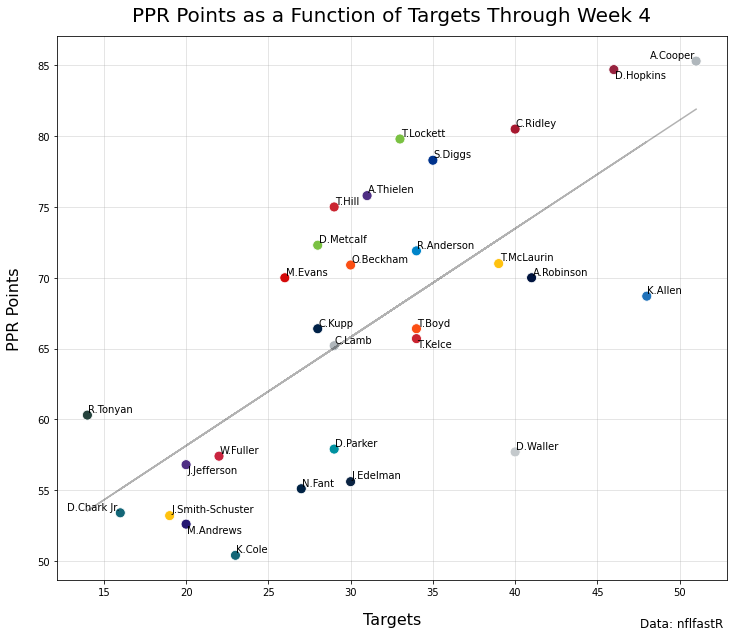

In [42]:
#Create a figure
fig, ax = plt.subplots(figsize=(12,10))

#Map the COLORS dictionary to the posteam column
viz['color'] = viz['posteam'].map(COLORS)

#Create the scatterplot
sns.scatterplot(x = viz.targets, y = viz.total_fpts, c = viz.color,s=100)

#Add labels to each data point
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    viz.targets, viz.total_fpts, viz.player)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(viz.targets, viz.total_fpts, 1)

plt.plot(viz.targets, m*viz.targets + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('PPR Points as a Function of Targets Through Week 4',fontsize=20,pad=15)
ax.set_xlabel('Targets',fontsize=16,labelpad=15)
ax.set_ylabel('PPR Points',fontsize=16,labelpad=15)
plt.figtext(.8,.06,'Data: nflfastR',fontsize=12)

#Save figure if you wish
#plt.savefig('_name_.png',dpi=300)

Now let's do air yards.

Text(0.8, 0.06, 'Data: nflfastR')

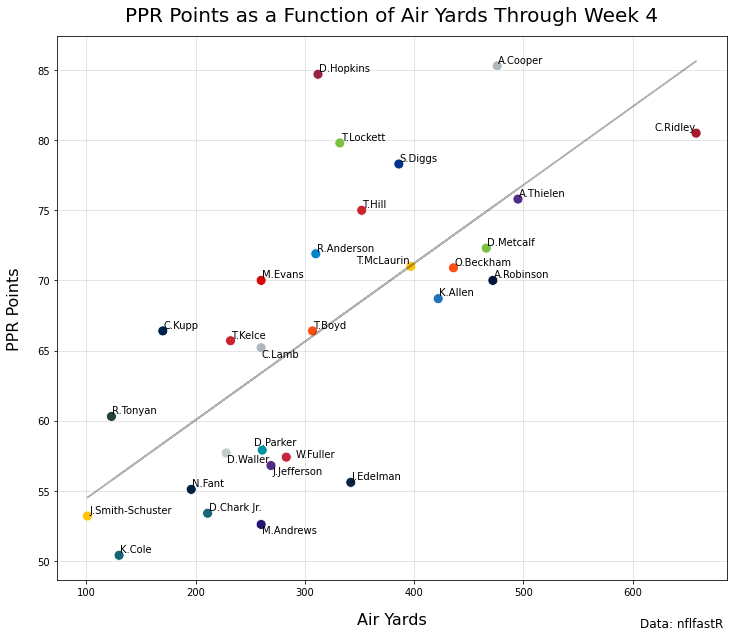

In [43]:
#Create a figure
fig, ax = plt.subplots(figsize=(12,10))

#Map the COLORS dictionary to the posteam column
viz['color'] = viz['posteam'].map(COLORS)

#Subset the top 30 players by wopr (we don't want a crowded plot)
viz = viz[(viz.player.isin(receivers))]

#Create the scatterplot
sns.scatterplot(x = viz.air_yards, y = viz.total_fpts, c = viz.color,s=100)

#Add labels to each data point
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    viz.air_yards, viz.total_fpts, viz.player)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend lines for the metrics
m, b = np.polyfit(viz.air_yards, viz.total_fpts, 1)

plt.plot(viz.air_yards, m*viz.air_yards + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('PPR Points as a Function of Air Yards Through Week 4',fontsize=20,pad=15)
ax.set_xlabel('Air Yards',fontsize=16,labelpad=15)
ax.set_ylabel('PPR Points',fontsize=16,labelpad=15)
plt.figtext(.8,.06,'Data: nflfastR',fontsize=12)

#Save figure if you wish
#plt.savefig('_name_.png',dpi=300)

There we go, our first two plots! Both air yards and targets seem to have a pretty linear relationship in this small sample... It's almost as if [volume is really important in fantasy football](https://twitter.com/mnpykings/status/1285608398269173762?s=20)!

Let's make another viz. This time, more advanced! We are going to define our own function that will plot any receiver's air yards distribution just by typing in their (nflfastR) name and team.

We create a function by starting with the keyword `def`, followed by the function name and then its parameters (if any) in parenthesis. All of the code within our function will run whenever we call it.

The explanatory text at the beginning of this function is called a documentation string, or `docstring` and is a good practice when creating functions. If you share your code with someone else, or come back to your own code in the future, you will have no trouble trying to understand or remember what your function does.

As for the rest of the code, it is similar to everything we have previously done in this tutorial!

In [44]:
def ay_distribution(receiver, team):
  
  '''
  This function plots the air yards distribution
  for any given NFL player
  
  Parameters: 
    receiver (str): The name of the player in nflfastR
    format (J.Doe) 
  
    team (str): The team that receiver is currently on

  '''

  #Create a figure
  fig, ax = plt.subplots(figsize=(10,10))

  #Subset our data to include passes only for the
  #player and team we choose
  ay_dist = data[
                 (data.play_type=='pass') &
                 (data.qb_dropback==1) &
                 (data.epa.isna()==False) &
                 (data.receiver==receiver) &
                 (data.posteam==team)
                 ]

  #Add grid
  ax.grid(zorder=0,alpha=.4)
  ax.set_axisbelow(True)

  #Set x-axis limits
  ax.set_xlim(-10,50)

  #Add colors
  COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D',
            'CAR':'#0085CA','CHI':'#00143F','CIN':'#FB4F14','CLE':'#FB4F14',
            'DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
            'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430',
            'LA':'#002147','LAC':'#2072BA','LV':'#C4C9CC','MIA':'#0091A0',
            'MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
            'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142',
            'SF':'#C9243F','TB':'#D40909','TEN':'#4095D1','WAS':'#FFC20F'}

  #Create plot
  sns.kdeplot(ay_dist.air_yards,fill=True,color=COLORS.get(team))

  #Add title, labels, and cite the data source.
  #the formatted string allows to pass the receiver
  #parameter input to the title
  plt.title(f"{receiver}'s Air Yards Distribution",fontsize=20)
  plt.xlabel('Air Yards',fontsize=14)
  plt.ylabel('Density',fontsize=14)
  plt.figtext(0.8,0.06,'Data: nflfastR')

Why do we need to add the team abbreviation along with player name, might you ask? Some players within the league share the same nflfastR name and we don't want to combine their air yards in the same plot. For example, `M.Brown` could mean Marquise Brown for BAL or Malcolm Brown for LA, `T.Hill` could be Tyreek Hill for KC or Taysom Hill for NO, etc.. The `team` parameter alleviates this issue that would misrepresent our data if not accounted for.


Now that we have our function defined, we can call it by typing the name of the funtion with it's parameters in parenthesis. Remember, both must be entered as strings since that's how we set it up.

Let's compare Tyler Lockett and DK Metcalf's air yards distributions!

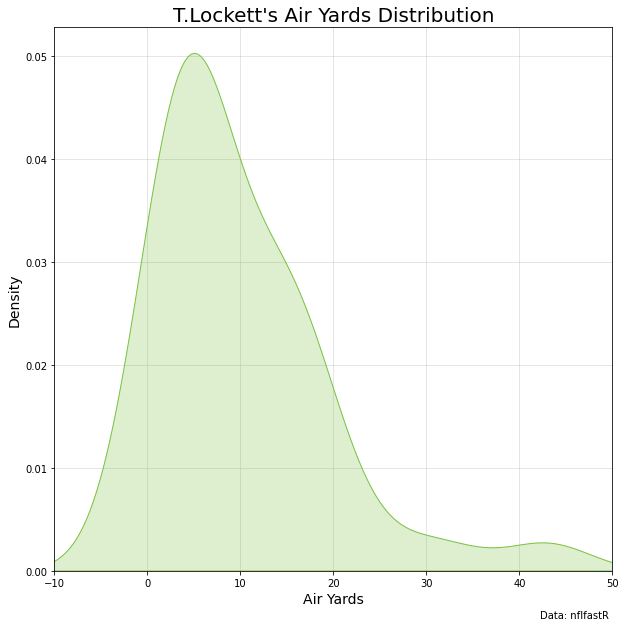

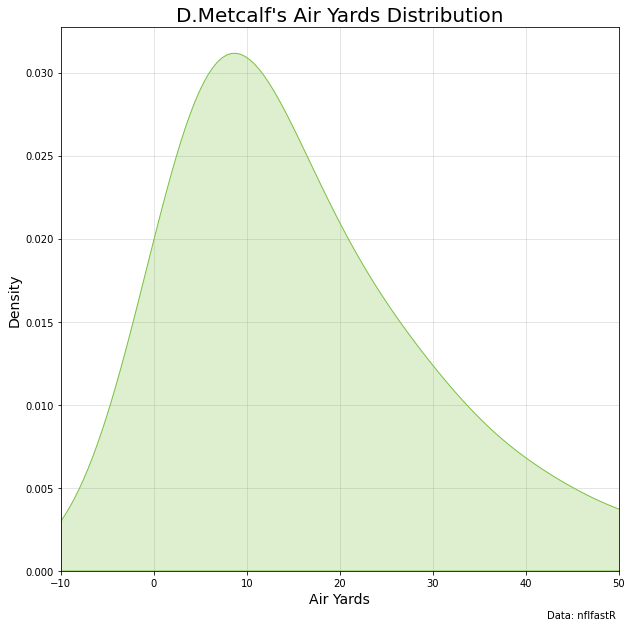

In [45]:
ay_distribution('T.Lockett','SEA')
ay_distribution('D.Metcalf','SEA')

Wow, it definitely looks like DK has gotten more deep ball opportunity thus far in 2020.

This next distribution is my favorite:

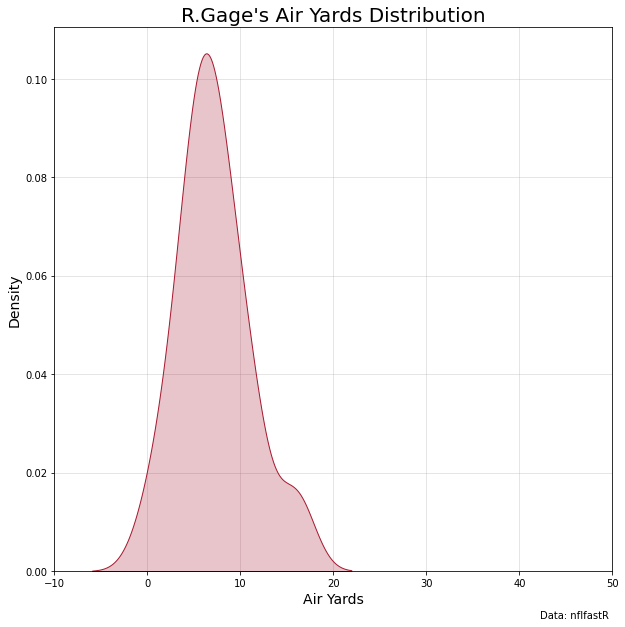

In [46]:
ay_distribution('R.Gage','ATL')

Russell Gage of the Falcons absolutely eats from the slot! Even given his limited air yards opportunity, he has logged 19-208-1 through four games this season.

This function is a really cool way to see how each player is getting their opportunity! 

Functions are a great way to run many lines of code in one click. I use tons of them to quickly create my viz.

#Closing Items

If you've made it this far, I greatly appreciate you taking the time to do so and I hope you learned some python in the process! I highly encourage making a twitter account and posting your findings there; both the general analytics and fantasy communities are full of great people! I also encourage you to take a deep dive into this data and get creative; there are endless analyses to be made with such rich data that nflfastR provides. For more tutorials and content, definitely check out Ben and Sebastian's [Open Source Football](https://www.opensourcefootball.com/) website where members of the community share their amazing projects. Again, and I cannot iterate this enough, there is so much data available and this tutorial doesn't even begin to scratch the surface of potential findings. Challenge yourself to see what you can dig up! That concludes this tutorial, thanks for reading!


Below are icons for everything I've linked throughout this tutorial, in case you missed one. I am having too much fun with markdown 😂 .

*Right click an icon to visit its respective page!*

[<img align="left" alt="Python" width="50px" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcode.fb.com%2Fwp-content%2Fuploads%2F2016%2F05%2F2000px-Python-logo-notext.svg_.png&f=1&nofb=1" />][Python]
[<img align="left" alt="Colab" width="75px" src="https://colab.research.google.com/img/colab_favicon_256px.png" />][colab]
[<img align="left" alt="nflfastR" width="75px" src="https://www.nflfastr.com/reference/figures/logo.png" />][nflfastR] 
[<img align="left" alt="OSF" width="75px" src="https://www.opensourcefootball.com/logo.png" />][OSF]
[<img align="left" alt="benbaldwin" width="75px" src="https://pbs.twimg.com/profile_images/1302946750488023041/KGd678va_400x400.jpg" />][benbaldwin]
[<img align="left" alt="mrcaseb" width="75px" src="https://pbs.twimg.com/profile_images/1315622273496363009/cmoEfOPS_400x400.jpg" />][mrcaseb]
[<img align="left" alt="deryck" width="75px" src="https://pbs.twimg.com/profile_images/1375943876469387266/iYNAoUzx_400x400.jpg" />][deryck]
[<img align="left" alt="pykings" width="75px" src="https://pbs.twimg.com/profile_images/1265092923588259841/LdwH0Ex1_400x400.jpg" />][mnpykings]

<br/>
<br/>
<br/>
<br/>

[<img align="left" alt="pandas" width="150px" src="https://pandas.pydata.org/docs/_static/pandas.svg" />][pandas]


[<img align="left" alt="matplotlib" width="150px" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmatplotlib.org%2F_static%2Flogo2.png&f=1&nofb=1" />][matplotlib]

[<img align="left" alt="Seaborn" width="150px" src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" />][Seaborn]

[<img align="left" alt="numpy" width="150px" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2F3%2F31%2FNumPy_logo_2020.svg%2F1024px-NumPy_logo_2020.svg.png&f=1&nofb=1" />][numpy]

<br/>
<br/>
<br/>


####**By: [@mnpykings](https://twitter.com/mnpykings), 2020**

[nflfastR]: https://mrcaseb.github.io/nflfastR/
[OSF]: https://www.opensourcefootball.com/
[benbaldwin]: https://twitter.com/benbbaldwin 
[mrcaseb]: https://twitter.com/mrcaseb 
[deryck]: https://twitter.com/DeryckG_
[mnpykings]: https://twitter.com/mnpykings

[Python]: https://www.python.org/ 
[Seaborn]: https://seaborn.pydata.org/#
[matplotlib]: https://matplotlib.org/#
[pandas]: https://pandas.pydata.org/docs/
[numpy]: https://numpy.org/
[colab]: https://colab.research.google.com/notebooks/intro.ipynb


